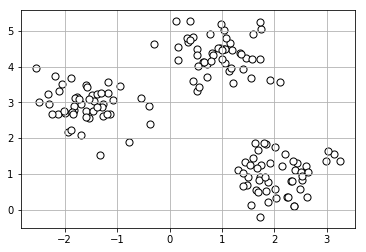

In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

plt.scatter(X[:, 0],
           X[:, 1],
           c='white',
           marker='o',
           edgecolor='black',
           s=50)

plt.grid()
plt.show()

In [2]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(X)

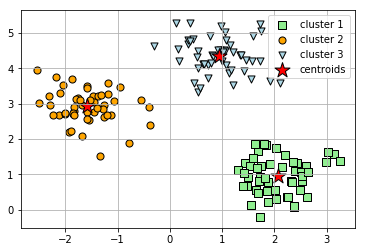

In [3]:
plt.scatter(X[y_km == 0, 0],
           X[y_km == 0, 1],
           s=50, c='lightgreen',
           marker='s', edgecolor='black',
           label='cluster 1')

plt.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1],
           s=50, c='orange',
           marker='o', edgecolor='black',
           label='cluster 2')

plt.scatter(X[y_km == 2, 0],
           X[y_km == 2, 1],
           s=50, c='lightblue',
           marker='v', edgecolor='black',
           label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
           km.cluster_centers_[:, 1],
           s=250, marker='*',
           c='red', edgecolor='black',
           label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [5]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


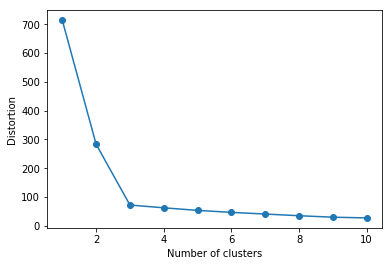

In [6]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

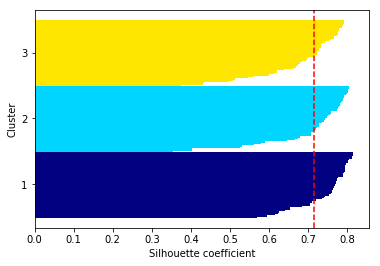

In [8]:
# plot of the silhouette coefficient for a k-means clustering with k=3
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples


km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,
           color="red",
           linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

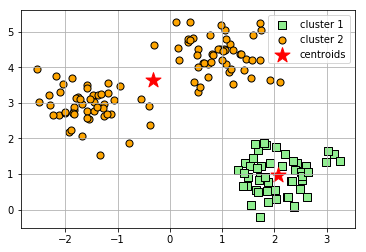

In [9]:
km = KMeans(n_clusters=2,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
           X[y_km == 0, 1],
           s=50, c='lightgreen',
           edgecolor='black',
           marker='s',
           label='cluster 1')

plt.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1],
           s=50,
           c='orange',
           edgecolor='black',
           marker='o',
           label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
           km.cluster_centers_[:, 1],
           s=250,
           marker='*',
           c='red',
           label='centroids')

plt.legend()
plt.grid()
plt.show()

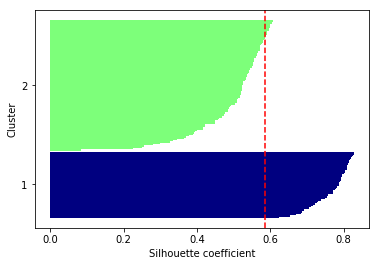

In [10]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()